The data could be found at https://www.kaggle.com/ninzaami/loan-predication

### Context
Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.
Problem-----
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting the Data
df=pd.read_csv(r"C:\Users\ayush\Desktop\Machine Learning Projects\Loan Prediction\Loan Data.csv")

## EDA

In [3]:
#Knowing the Type of Data
type(df)

pandas.core.frame.DataFrame

In [4]:
#First 5 rows of the Dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Bottom 5 rows of the dataset
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#General Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Visualisation

In [7]:
gender_count= df["Gender"].value_counts()
pd.DataFrame(gender_count)



,Gender
Male,489
Female,112


Text(0.5, 1.0, 'Gender-Wise Distribution of Loan Takers')

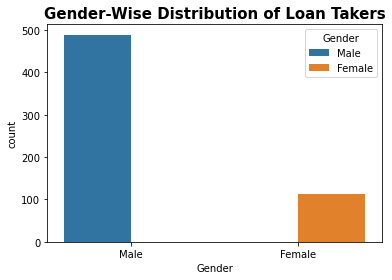

In [8]:
sns.countplot("Gender",data=df,hue="Gender")
plt.title("Gender-Wise Distribution of Loan Takers",weight="bold", size=15)


In [9]:
pd.DataFrame(df["Married"].value_counts())

,Married
Yes,398
No,213


Text(0.5, 1.0, 'Matrial Status Distribution of Loan Takers')

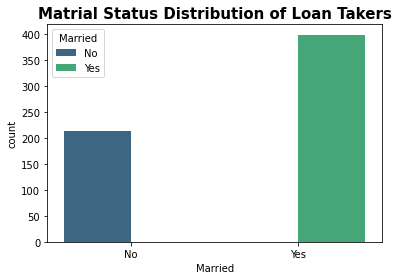

In [10]:
sns.countplot("Married",data=df,hue="Married",palette="viridis")
plt.title("Matrial Status Distribution of Loan Takers",weight="bold", size=15)


In [11]:
pd.DataFrame(df["Education"].value_counts())

,Education
Graduate,480
Not Graduate,134


Text(0.5, 1.0, 'Education-Wise Distribution of Loan Takers')

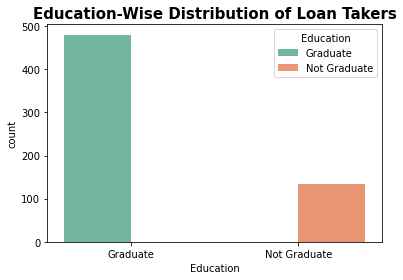

In [12]:
sns.countplot("Education",data=df,hue="Education",palette="Set2")
plt.title("Education-Wise Distribution of Loan Takers",weight="bold", size=15)


In [13]:
pd.DataFrame(df["Property_Area"].value_counts())

,Property_Area
Semiurban,233
Urban,202
Rural,179


Text(0.5, 1.0, 'Area-Wise Distribution of Loan Takers')

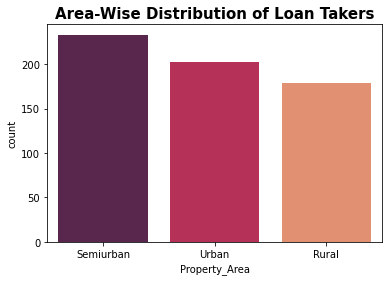

In [14]:
sns.countplot(x="Property_Area",data=df,palette="rocket",order=df["Property_Area"].value_counts(ascending=False).index)
plt.title("Area-Wise Distribution of Loan Takers",weight="bold", size=15)

## Data Preprocessing

In [15]:
#Getiing the number of Null Values in the Dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#Filling Null values with the Mean
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace= True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [17]:
# Finding the Null Values after filling the Loan Amount Column.
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#Dropping the Remaining nulll values
df.dropna(inplace=True)

In [19]:
# Checking if No Null values Remain
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
# Finding the Number of rows and columns in the Data
df.shape

(499, 13)

In [21]:
# Getting some Statistical Information about the Data.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,5336.128257,1566.995832,144.799261,342.012024,0.851703
std,5618.157076,2580.954598,78.958084,64.860368,0.355750
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2885.500000,0.000000,101.500000,360.000000,1.000000
50%,3859.000000,1086.000000,130.000000,360.000000,1.000000
75%,5825.000000,2251.500000,166.500000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [22]:
# Counting the Unique values in the Dependents Column
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [23]:
#Replacing the Term '3+' dependents as 4
df=df.replace(to_replace='3+', value=4)

In [24]:
#Rechecking the Dependents Column
df["Dependents"].unique()

array(['0', '1', '2', 4], dtype=object)

In [25]:
#Filling Numerical data in plcae of categorical Data
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,Y


## Machine Learning

* We would be following the steps to get the right estimator as given at https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* Since this is a Categorical Classification, we would be using Linear SVC and Naive Bayes.

In [27]:
#Splitting The DataSet into X and Y
x= df.drop(columns=["Loan_ID","Loan_Status"],axis=1)
y=df["Loan_Status"]

In [28]:
#Splitting the Data into Training and test with a Test Size of 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train
    

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
67,1,1,1,1,0,10750,0.000000,312.0,360.0,1.0,2
277,1,1,0,1,0,3103,1300.000000,80.0,360.0,1.0,2
347,1,1,2,0,0,3083,2168.000000,126.0,360.0,1.0,2
599,1,1,2,1,0,5780,0.000000,192.0,360.0,1.0,2
270,0,0,0,1,0,3237,0.000000,30.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
134,1,0,0,1,0,4895,0.000000,102.0,360.0,1.0,1
330,1,0,1,1,0,4384,1793.000000,117.0,360.0,1.0,2
428,1,1,0,1,0,2920,16.120001,87.0,360.0,1.0,0
537,1,0,2,1,0,3617,0.000000,107.0,360.0,1.0,1


In [30]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
566,1,0,0,1,0,3333,0.000000,70.0,360.0,1.0,2
88,1,0,0,1,0,8566,0.000000,210.0,360.0,1.0,2
282,1,1,2,1,0,2301,985.799988,78.0,180.0,1.0,2
213,1,1,4,0,1,5703,0.000000,130.0,360.0,1.0,0
288,0,0,0,1,0,4124,0.000000,115.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
300,1,1,0,0,0,1800,2934.000000,93.0,360.0,0.0,2
475,1,1,2,1,1,16525,1014.000000,150.0,360.0,1.0,0
22,1,1,0,0,0,2600,1911.000000,116.0,360.0,0.0,1
398,1,0,0,0,0,3902,1666.000000,109.0,360.0,1.0,0


In [31]:
y_train

67     Y
277    Y
347    Y
599    Y
270    Y
      ..
134    Y
330    Y
428    Y
537    Y
128    N
Name: Loan_Status, Length: 399, dtype: object

In [32]:
y_test

566    Y
88     Y
282    Y
213    Y
288    Y
      ..
300    N
475    Y
22     N
398    Y
408    N
Name: Loan_Status, Length: 100, dtype: object

In [33]:
# Using Standard Scaler on x_train and x_test, so as to Normalize the data into a Standard normal data.
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std= sc.transform(x_test)

### Linear SVC

In [34]:
#Importing Linear SVC model
from sklearn.svm import LinearSVC
lc= LinearSVC()
lc.fit(x_train,y_train)

LinearSVC()

In [35]:
# Predicting Y on the Linear SVC Model
y_pred_lc= lc.predict(x_test)
y_pred_lc


array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype=object)

In [36]:
# Calculating the Accuracy Score on the Basis of Linear SVC Model
from sklearn.metrics import accuracy_score
lc_score=accuracy_score(y_pred_lc,y_test)
print("The Accuracy Score for Linear SVC is ",(lc_score*100),"%")

The Accuracy Score for Linear SVC is  38.0 %


### Naive Bayes

In [37]:
# Importing the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [38]:
# Predicting y on the Gaussian Naive Bayes Model
y_pred_nb= nb.predict(x_test)
y_pred_nb

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N'], dtype='<U1')

In [39]:
# Calculating the Accuracy Score of Naive Bayes model
nb_score=accuracy_score(y_pred_nb,y_test)
print("The Accuracy of Naive Bayes Classfication is ",(nb_score)*100,"%")

The Accuracy of Naive Bayes Classfication is  79.0 %


In [40]:
# Concatenating the Accuracy Scores on a Pandas DataFrame
accuracy= {"Method":["Linear SVC","Naive Bayes"],"Score":[lc_score*100,nb_score*100 ] }
accuracy_df=pd.DataFrame.from_dict(accuracy)

In [41]:
accuracy_df

,Method,Score
0,Linear SVC,38.0
1,Naive Bayes,79.0


Text(0.5, 1.0, 'Accuracy Scores')

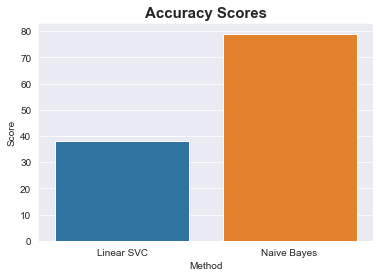

In [42]:
#Plotting the Accuracy Scores
sns.set_style("darkgrid")
sns.barplot(x=accuracy_df["Method"],y=accuracy_df["Score"],palette="tab10")
plt.title("Accuracy Scores",weight="bold",size=15)